In [1]:
# dependencies and setup
import matplotlib.pyplot as plt
import json

import requests
import pandas as pd
import numpy as np
import time
from scipy.stats import linregress

# import api_key
from api_key import api_key

# incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = {-90, 90}
long_range = {-180, 180}

In [2]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [3]:
# get weather information from
url = "http://api.openweathermap.org/data/2.5/weather?"
# show units in metric
units = "metric"

# build query url
query_url = f"{url}appid={api_key}&units={units}&q="

In [4]:
# create lists for loading the variable on each city
weather_dict = []

# set the count at 1
print(f"--"*20)
print(f"Beginning Data Retrieval")
print(f"--"*20)
count = 1

# loop through the list of cities, get response, jsonise it & and store in empty lists

for city in cities:
   
    response = requests.get(query_url + city).json()
    
    try:
#         reponse = requests.get(query_url + city).json()
        name_of_city = response["name"]
        temperature = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        lat = response["coord"]["lat"]
        long = response["coord"]["lon"]

        print(f"Processing Record {count} | {city}")
        
        weather_dict.append({"City": name_of_city,
               "Max_Temp": temperature,
               "Humidity": humidity,
               "Cloudiness": cloudiness,
               "Wind_Speed": wind_speed,
               "Latitude": lat,
               "Longitude": long})
       
        count += 1
        
    except:
        print("City not found. Skipping...")
        
        
print(f"--"*20)
print(f"Data retrieval complete")
print(f"--"*20)

----------------------------------------
Beginning Data Retrieval
----------------------------------------
Processing Record 1 | sibu
Processing Record 2 | agaro
Processing Record 3 | vitim
Processing Record 4 | east london
Processing Record 5 | jamestown
Processing Record 6 | sihora
Processing Record 7 | rikitea
Processing Record 8 | qaanaaq
Processing Record 9 | margate
Processing Record 10 | thompson
Processing Record 11 | cartagena
Processing Record 12 | ushuaia
Processing Record 13 | sawtell
City not found. Skipping...
Processing Record 14 | hermanus
Processing Record 15 | rocha
Processing Record 16 | ahipara
Processing Record 17 | hilo
Processing Record 18 | lancut
Processing Record 19 | safaga
City not found. Skipping...
Processing Record 20 | puerto ayora
Processing Record 21 | lebu
Processing Record 22 | albany
Processing Record 23 | punta arenas
Processing Record 24 | dikson
Processing Record 25 | bethel
Processing Record 26 | iisaku
Processing Record 27 | mwanza
City not fou

Processing Record 225 | vestmannaeyjar
Processing Record 226 | marion
Processing Record 227 | pietarsaari
Processing Record 228 | constitucion
Processing Record 229 | sao felix do xingu
Processing Record 230 | antofagasta
Processing Record 231 | wainwright
Processing Record 232 | muroto
Processing Record 233 | bischofshofen
Processing Record 234 | mattru
Processing Record 235 | balabac
Processing Record 236 | tandil
Processing Record 237 | vila franca do campo
Processing Record 238 | la rioja
Processing Record 239 | urusha
Processing Record 240 | nantucket
Processing Record 241 | muros
City not found. Skipping...
Processing Record 242 | castro
Processing Record 243 | birin
City not found. Skipping...
Processing Record 244 | tecoanapa
Processing Record 245 | college
Processing Record 246 | komsomolskiy
City not found. Skipping...
Processing Record 247 | moron
Processing Record 248 | kem
Processing Record 249 | nauta
City not found. Skipping...
Processing Record 250 | dakar
Processing Re

Processing Record 451 | puyo
Processing Record 452 | dhadar
Processing Record 453 | orcopampa
City not found. Skipping...
Processing Record 454 | fare
Processing Record 455 | celestun
Processing Record 456 | saurikh
Processing Record 457 | chioggia
Processing Record 458 | dovbysh
Processing Record 459 | ayagoz
Processing Record 460 | bairnsdale
Processing Record 461 | fremont
City not found. Skipping...
Processing Record 462 | jussara
Processing Record 463 | roma
Processing Record 464 | morrope
Processing Record 465 | sakakah
Processing Record 466 | henties bay
Processing Record 467 | luena
Processing Record 468 | whitehorse
Processing Record 469 | pervomayskiy
Processing Record 470 | angers
Processing Record 471 | zhigansk
Processing Record 472 | elblag
Processing Record 473 | nueva gerona
Processing Record 474 | hobyo
Processing Record 475 | tomatlan
Processing Record 476 | abapo
City not found. Skipping...
Processing Record 477 | waingapu
Processing Record 478 | kamien pomorski
Proc

In [5]:
# create the weather dataframe in preperation for saving as a CSV file
# weather_dict =({"City": name_of_city,
#                "Max_Temp": temperature,
#                "Humidity": humidity,
#                "Cloudiness": cloudiness,
#                "Wind_Speed": wind_speed,
#                "Latitude": lat,
#                "Longitude": long})
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Max_Temp,Humidity,Cloudiness,Wind_Speed,Latitude,Longitude
0,Sibu,30.00,74,40,2.06,2.3000,111.8167
1,Āgaro,16.16,98,100,0.42,7.8500,36.6500
2,Vitim,2.08,98,100,4.72,59.4511,112.5578
3,East London,19.77,46,86,4.13,-33.0153,27.9116
4,Jamestown,1.11,86,40,4.63,42.0970,-79.2353


In [6]:
# save data to CSV file
weather_data.to_csv('weather_data.csv')


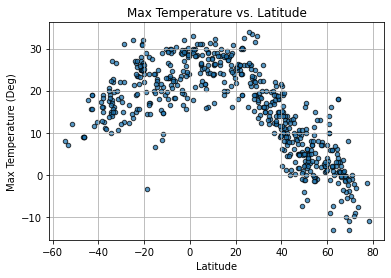

The scatter plot here is demonstrating that temparature increases as you get closer to the equator.


In [7]:
# create a scatter plots to showcase Temperature (Deg) vs. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Max_Temp"], marker="o",s=20,alpha=.75, edgecolors="k")
plt.title(f"Max Temperature vs. Latitude")
plt.ylabel("Max Temperature (Deg)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Max Temperature vs. Latitude.png")
plt.show()
print(f"The scatter plot here is demonstrating that temparature increases as you get closer to the equator.")

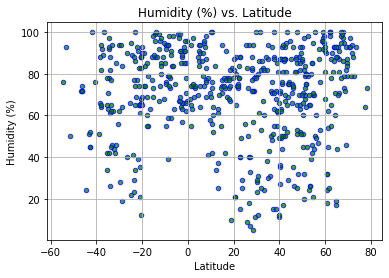

The scatter plot here is demonstrating that there is minimal realtionship between Humidity and Latitude. However there is a denser attraction of cities with a higher percentage of Humidity north of the Equator.


In [22]:
# create a scatter plots to showcase Humidity (%) vs. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o",s=20,alpha=.75, edgecolor="b", facecolor="g")
plt.title(f"Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Humidy (%) vs. Latitude.png")
plt.show()
print(f"The scatter plot here is demonstrating that there is minimal realtionship between Humidity and Latitude. However there is a denser attraction of cities with a higher percentage of Humidity north of the Equator.")

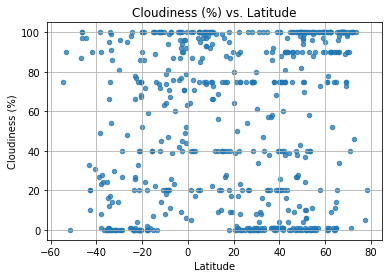

The scatter plot here is demonstrating that there is minimal realtionship between Cloudiness and Latitude.


In [23]:
# create a scatter plots to showcase Cloudiness (%) vs. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o",s=20,alpha=.75)
plt.title(f"Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Cloudiness (%) vs. Latitude.png")
plt.show()
print(f"The scatter plot here is demonstrating that there is minimal realtionship between Cloudiness and Latitude.")

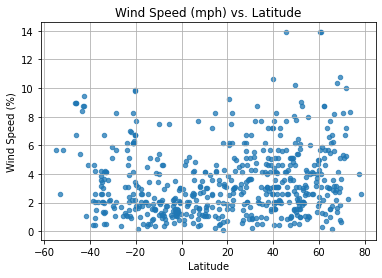

The scatter plot here is demonstrating that there is minimal realtionship between Wind Speed and Latitude. However, the scatter plot does indicate that there are higher wind speeds North of the Equator.


In [10]:
# create a scatter plots to showcase Wind Speed (mph) vs. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Wind_Speed"], marker="o",s=20,alpha=.75)
plt.title(f"Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Wind Speed (mph) vs. Latitude.png")
plt.show()
print(f"The scatter plot here is demonstrating that there is minimal realtionship between Wind Speed and Latitude. However, the scatter plot does indicate that there are higher wind speeds North of the Equator.")

In [11]:
# USing dropna, create Northern and Southern Hemisphere Data Frames by < and > Latitude 0 degrees.

northern_hemisphere = weather_data[weather_data["Latitude"] > 0].dropna()
print("Northern Hemisphere") 
print(northern_hemisphere["Latitude"].min())
print(northern_hemisphere["Latitude"].max())
print(northern_hemisphere["Latitude"].mean())
print(northern_hemisphere["Latitude"].median())
print(northern_hemisphere["Latitude"].std())

southern_hemisphere = weather_data[weather_data["Latitude"] < 0].dropna()
print("Southern Hemisphere") 
print(southern_hemisphere["Latitude"].min())
print(southern_hemisphere["Latitude"].max())
print(southern_hemisphere["Latitude"].mean())
print(southern_hemisphere["Latitude"].median())
print(southern_hemisphere["Latitude"].std())
# #Create Southern Hemisphere DataFrame. Ensure no latitudes over 0 are in the dataframe.
# southern_hemi = city_data_df[city_data_df["Latitude"] < 0].dropna()
# print("---------------------")
# print("Southern Hemisphere") 
# print(southern_hemi["Latitude"].max())


Northern Hemisphere
0.8
78.2186
38.97220286458335
40.66205
19.750493383171783
Southern Hemisphere
-54.8
-0.4139
-20.535287027027035
-20.3297
13.266063051822854


This plot demonstrates that there is a strong negative relationship between the Latitude and Temperature. The further North you get, the colder it gets.


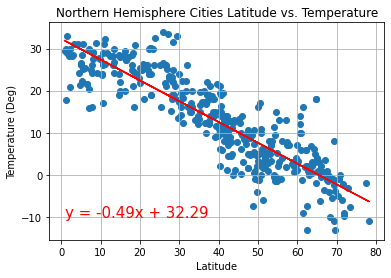

In [45]:
# create a scatter plot to showcase northern hemisphere Temperature (Deg) vs. Latitude & run a linear regression
plt.scatter(northern_hemisphere["Latitude"], northern_hemisphere["Max_Temp"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Latitude"], northern_hemisphere["Max_Temp"])
regress_values = northern_hemisphere['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hemisphere['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(1,-10),fontsize=15,color="red")
plt.title(f'Northern Hemisphere Cities Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (Deg)')
plt.grid(True)
plt.savefig('Northern Hemisphere lat_vs_temp.png',bbox_inches='tight')
print(f"This plot demonstrates that there is a strong negative relationship between the Latitude and Temperature. The further North you get, the colder it gets.")

This plot demonstrates that there is a weak positive relationship between the Northern Hemsiphere Cities Latitude and Humidity. The further North the cities are located, the more humid it becomes.


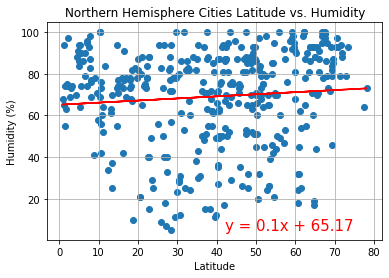

In [38]:
# create a scatter plot to showcase northern hemisphere Humidity (%) vs. Latitude & run a linear regression
plt.scatter(northern_hemisphere["Latitude"], northern_hemisphere["Humidity"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Latitude"], northern_hemisphere["Humidity"])
regress_values = northern_hemisphere['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hemisphere['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(42,5),fontsize=15,color="red")
plt.title(f'Northern Hemisphere Cities Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('Northern Hemisphere lat_vs_humidity.png',bbox_inches='tight')
print(f"This plot demonstrates that there is a weak positive relationship between the Northern Hemsiphere Cities Latitude and Humidity. The further North the cities are located, the more humid it becomes.")


This plot demonstrates that there is a no relationship between the Northern Hemsiphere Cities Latitude and Cloudiness.


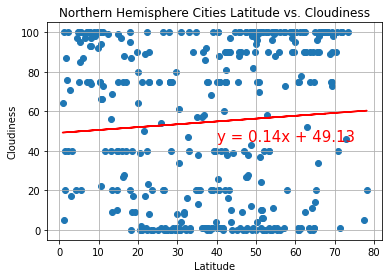

In [40]:
# create a scatter plot to showcase northern hemisphere Cloudiness vs. Latitude & run a linear regression
plt.scatter(northern_hemisphere["Latitude"], northern_hemisphere["Cloudiness"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Latitude"], northern_hemisphere["Cloudiness"])
regress_values = northern_hemisphere['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hemisphere['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.title(f'Northern Hemisphere Cities Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)
plt.savefig('Northern Hemisphere lat_vs_cloudiness.png',bbox_inches='tight')
print(f"This plot demonstrates that there is a no relationship between the Northern Hemsiphere Cities Latitude and Cloudiness.")

This plot demonstrates that there is a no relationship between the Northern Hemsiphere Cities Latitude and Wind Speed.


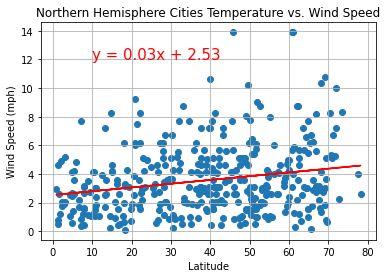

In [42]:
# create a scatter plot to showcase northern hemisphere Wind_Speed vs. Latitude & run a linear regression
plt.scatter(northern_hemisphere["Latitude"], northern_hemisphere["Wind_Speed"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Latitude"], northern_hemisphere["Wind_Speed"])
regress_values = northern_hemisphere['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hemisphere['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
plt.title(f'Northern Hemisphere Cities Temperature vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('Northern Hemisphere lat_vs_wind_speed.png',bbox_inches='tight')
print(f"This plot demonstrates that there is a no relationship between the Northern Hemsiphere Cities Latitude and Wind Speed.")

This plot demonstrates that there is a strong positve relationship between Latitude and Temperature. The further South you get, the colder it gets.


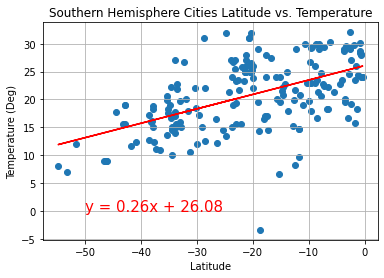

In [54]:
# create a scatter plot to showcase southern hemisphere Temperature (Deg) vs. Latitude & run a linear regression
plt.scatter(southern_hemisphere["Latitude"], southern_hemisphere["Max_Temp"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Latitude"], southern_hemisphere["Max_Temp"])
regress_values = southern_hemisphere['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hemisphere['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-50,0),fontsize=15,color="red")
plt.title(f'Southern Hemisphere Cities Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (Deg)')
plt.grid(True)
plt.savefig('Souther Hemisphere lat_vs_temp.png',bbox_inches='tight')
print(f"This plot demonstrates that there is a strong positve relationship between Latitude and Temperature. The further South you get, the colder it gets.")

This plot demonstrates that there is a weak positive relationship between Latitude and Humidity. The further North the cities are located, the more humid it becomes.


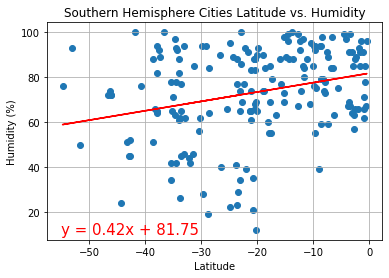

In [56]:
# create a scatter plot to showcase southern hemisphere Humidity (%) vs. Latitude & run a linear regression
plt.scatter(southern_hemisphere["Latitude"], southern_hemisphere["Humidity"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Latitude"], southern_hemisphere["Humidity"])
regress_values = southern_hemisphere['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hemisphere['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.title(f'Southern Hemisphere Cities Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('Southern Hemisphere lat_vs_humidity.png',bbox_inches='tight')
print(f"This plot demonstrates that there is a weak positive relationship between Latitude and Humidity. The further North the cities are located, the more humid it becomes.")


The linear regression demonstrates that there is no relationship between Southern Hemsiphere Latitude and Cloudiness.


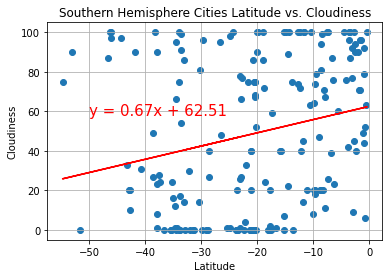

In [61]:
# create a scatter plot to showcase southern hemisphere Cloudiness vs. Latitude & run a linear regression
plt.scatter(southern_hemisphere["Latitude"], southern_hemisphere["Cloudiness"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Latitude"], southern_hemisphere["Cloudiness"])
regress_values = southern_hemisphere['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hemisphere['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-50,58),fontsize=15,color="red")
plt.title(f'Southern Hemisphere Cities Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)
plt.savefig('Southern Hemisphere lat_vs_cloudiness.png',bbox_inches='tight')
print(f"The linear regression demonstrates that there is no relationship between Southern Hemsiphere Latitude and Cloudiness.")


The linear regression demonstrates a loose, though negative relationship between Southern Hemsiphere Latitude and Wind Speed. The Wind Speed decreases the closer you get to the equator.


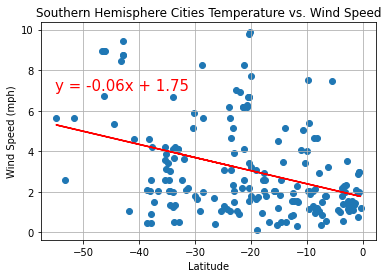

In [63]:
# create a scatter plot to showcase southern hemisphere Wind_Speed vs. Latitude & run a linear regression
plt.scatter(southern_hemisphere["Latitude"], southern_hemisphere["Wind_Speed"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Latitude"], southern_hemisphere["Wind_Speed"])
regress_values = southern_hemisphere['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hemisphere['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-55,7),fontsize=15,color="red")
plt.title(f'Southern Hemisphere Cities Temperature vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('Southern Hemisphere lat_vs_wind_speed.png',bbox_inches='tight')
print(f"The linear regression demonstrates a loose, though negative relationship between Southern Hemsiphere Latitude and Wind Speed. The Wind Speed decreases the closer you get to the equator.")